In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info

import pprint

#### How many experiments in total for excitatory neurons in primary visual cortex?

-----

#### Among these how many have natural movie one, and (theoratically) have eye tracking?

In [87]:
boc = BrainObservatoryCache()

In [68]:
n_repeats = 10
n_sessions = 3
n_divs =30
n_frames = 900
frames_per_repeat = int(n_frames/n_divs)


def get_run_vals(boc, id):
 
    data_set = boc.get_ophys_experiment_data(id)

    stim_table = data_set.get_stimulus_table('natural_movie_one')
    running_speed = data_set.get_running_speed()[0]

    run_vals = np.zeros((n_repeats, n_divs))

    # for each repeat:
    for repeat_idx in range(n_repeats):
        # grab all frames belongs to the repeat
        repeat_frames = np.array(stim_table.query('repeat == @repeat_idx')['start'])
        # for each block:
        for div_idx in range(n_divs):
            # grab block frames
            div_repeat_idxs = repeat_frames[
                div_idx*frames_per_repeat:(div_idx+1)*frames_per_repeat]     
            run_vals[repeat_idx, div_idx] = np.mean(running_speed[div_repeat_idxs])


    return run_vals
    

In [69]:
def plot_run(run_vals):
    
    plt.figure(figsize=(14,4))
    for i in range(10):
        plt.plot(run_vals[i,:])
    plt.show()

In [70]:
ec_ids_run   = [637998953,
                674802081,
                643592301,
                528792730,
                602616431,
                603425700,
                644909309,
                665722299,
                649401934,
                588503721,
                571137444,
                511510675,
                531134088,
                647155120,
                657082052,
                653122665,
                679702882,
                653932503,
                661744802,
                648377366]

ec_ids_backup =[650389885,
                528889127,
                653125128,
                652842570]

In [71]:
len(ec_ids_run)

20

Plotting running spd for container:  637998953
session: 0


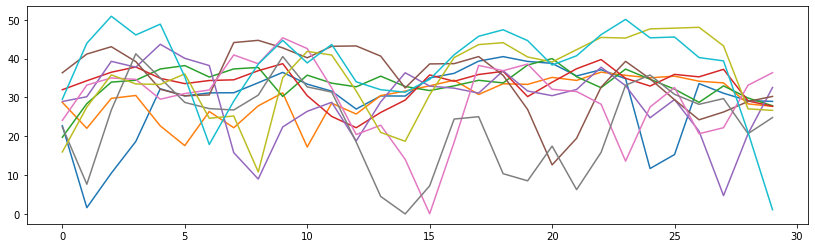

session: 1


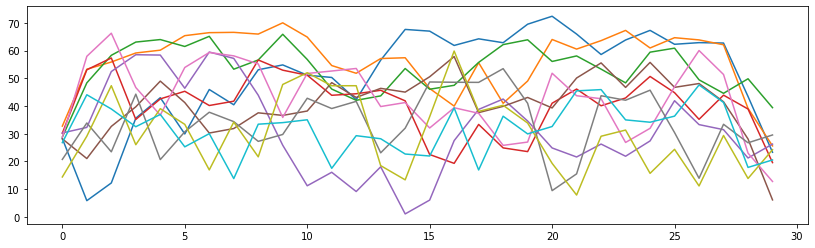

session: 2


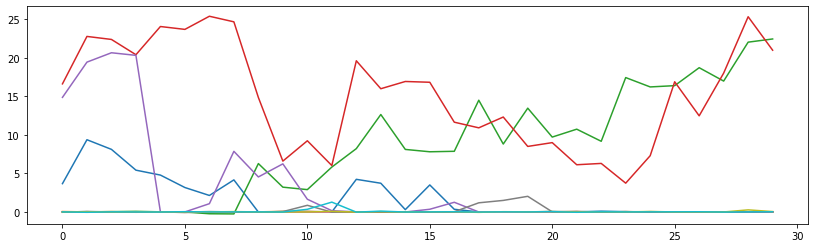

-------------------------------------------
Plotting running spd for container:  674802081
session: 0


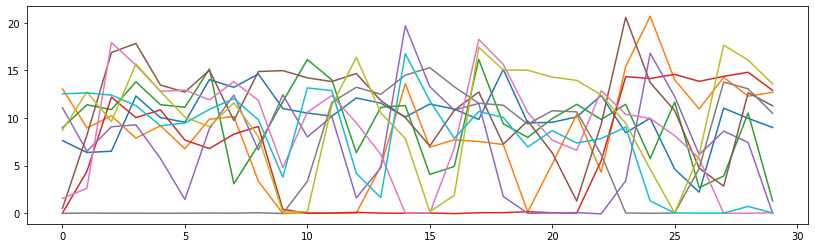

session: 1


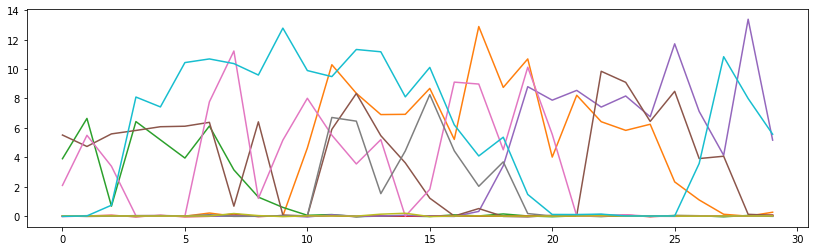

session: 2


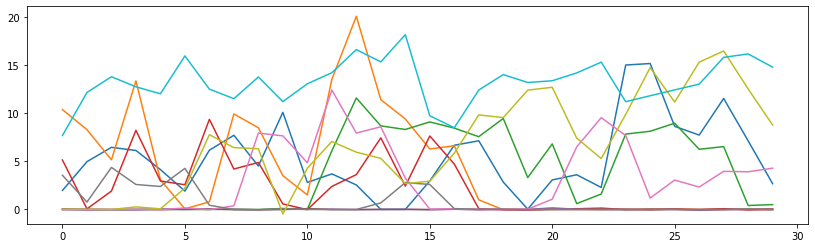

-------------------------------------------
Plotting running spd for container:  643592301
session: 0


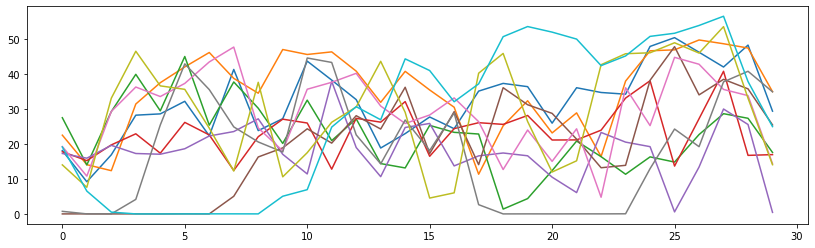

session: 1


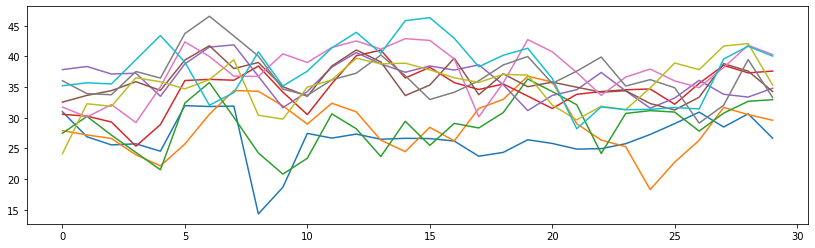

session: 2


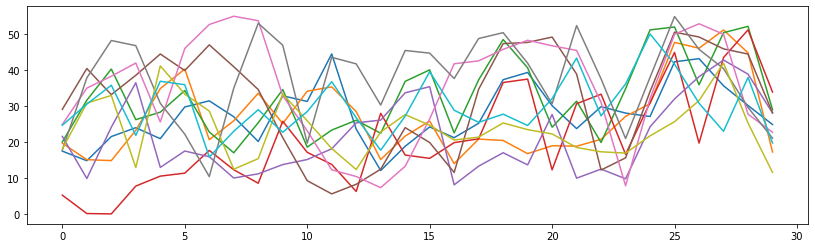

-------------------------------------------
Plotting running spd for container:  528792730
session: 0


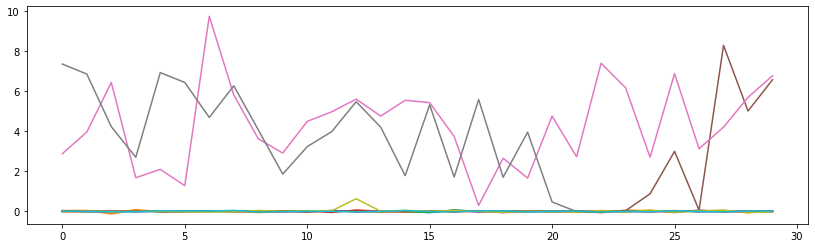

session: 1


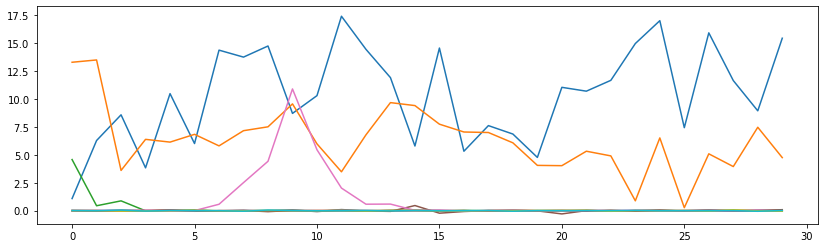

session: 2


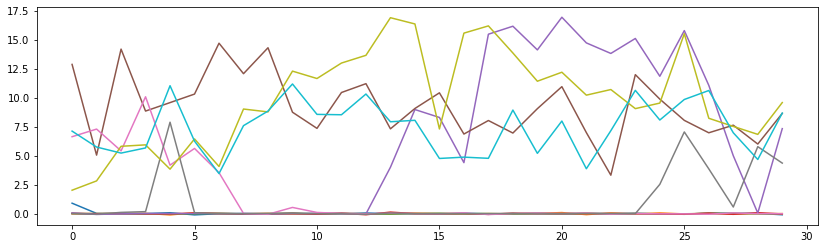

-------------------------------------------
Plotting running spd for container:  602616431
session: 0


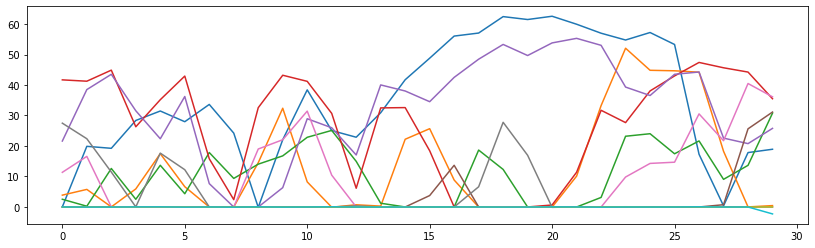

session: 1


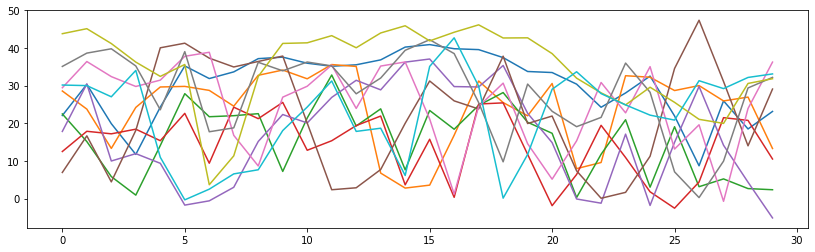

session: 2


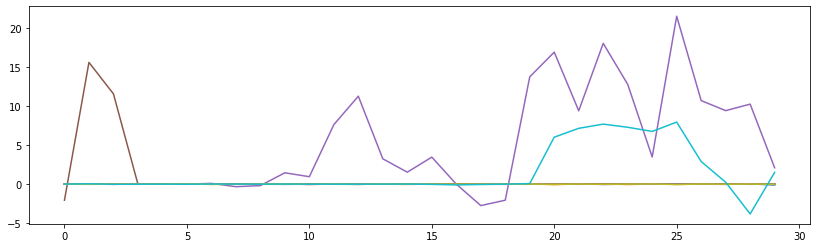

-------------------------------------------
Plotting running spd for container:  603425700
session: 0


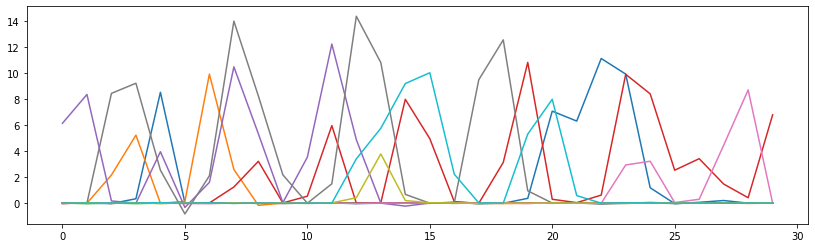

session: 1


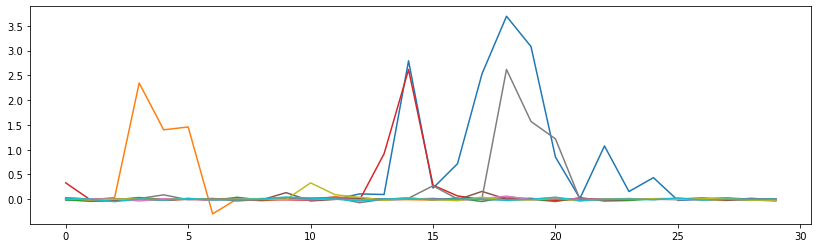

session: 2


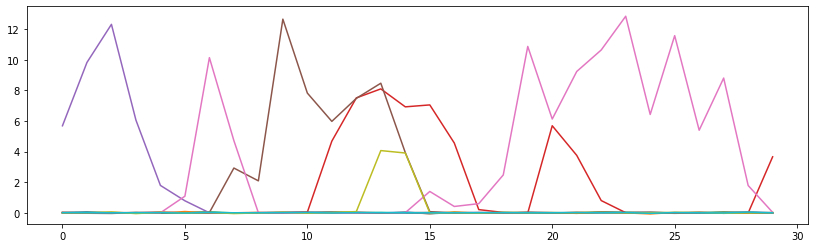

-------------------------------------------
Plotting running spd for container:  644909309
session: 0


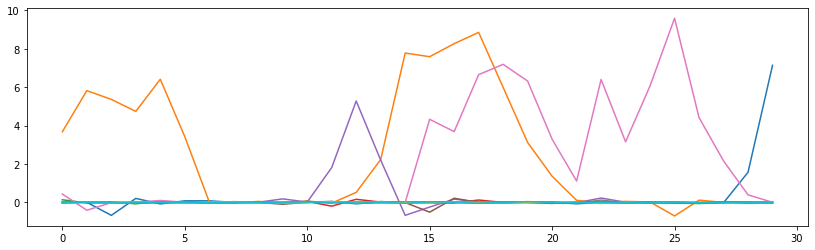

session: 1


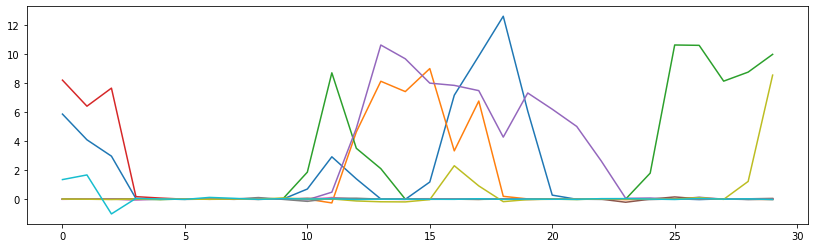

session: 2


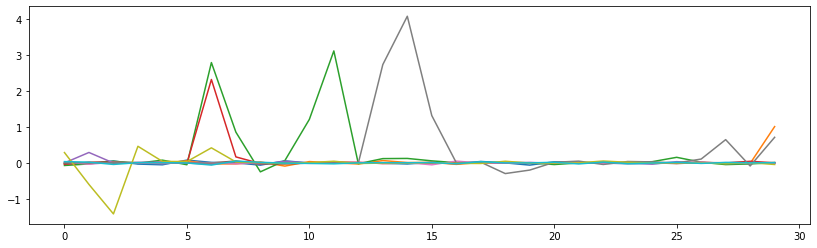

-------------------------------------------
Plotting running spd for container:  665722299
session: 0


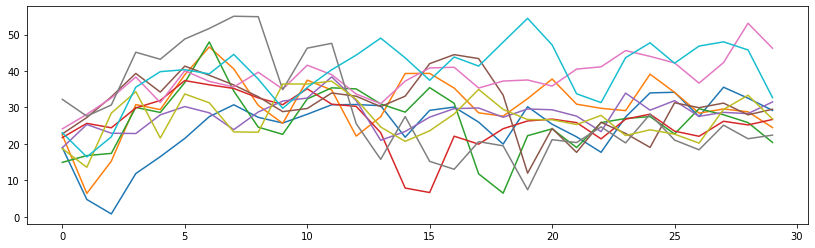

session: 1


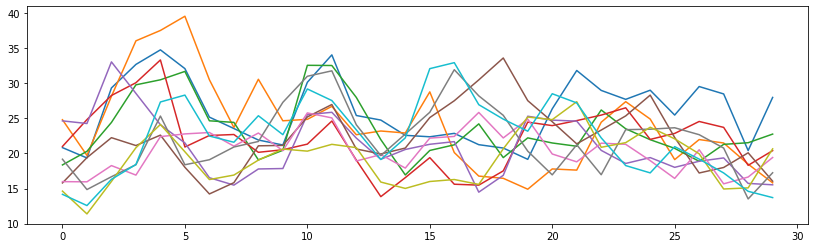

session: 2


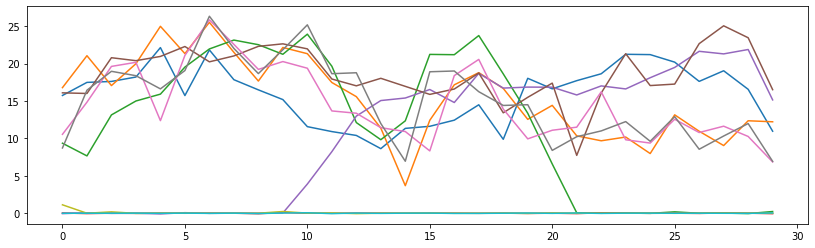

-------------------------------------------
Plotting running spd for container:  649401934
session: 0


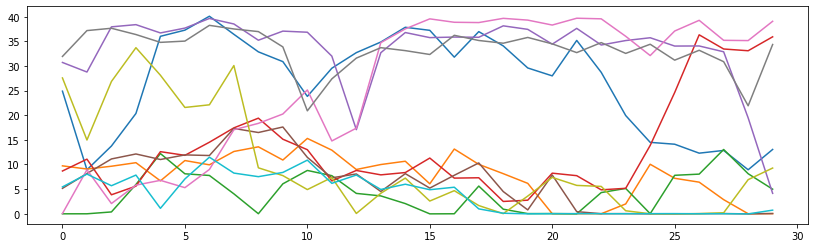

session: 1


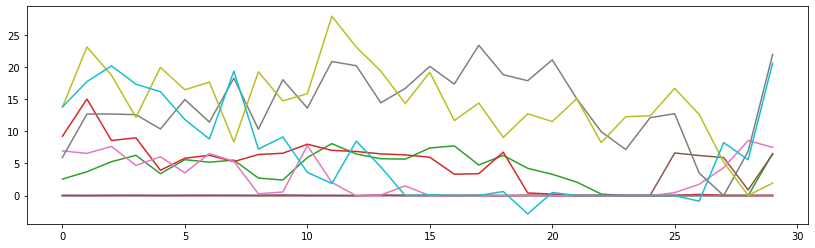

session: 2


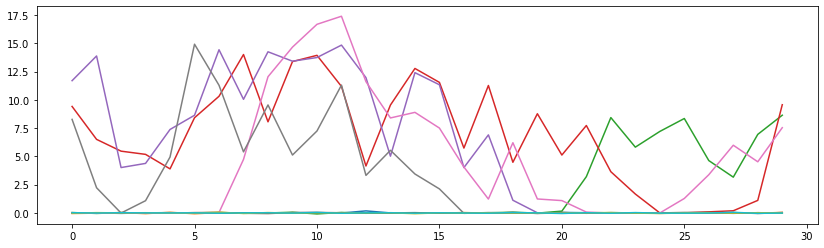

-------------------------------------------
Plotting running spd for container:  588503721
session: 0


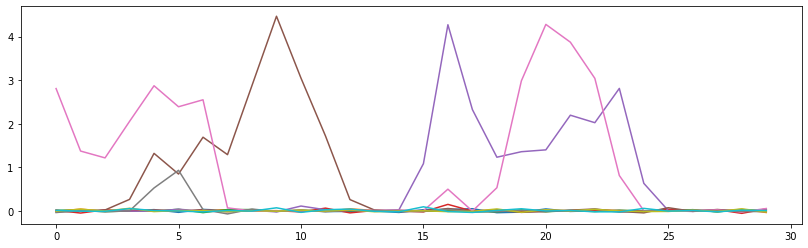

session: 1


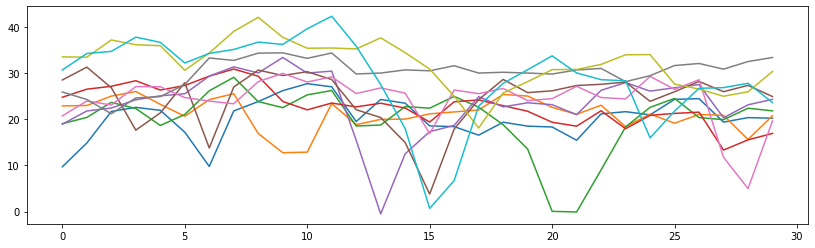

session: 2


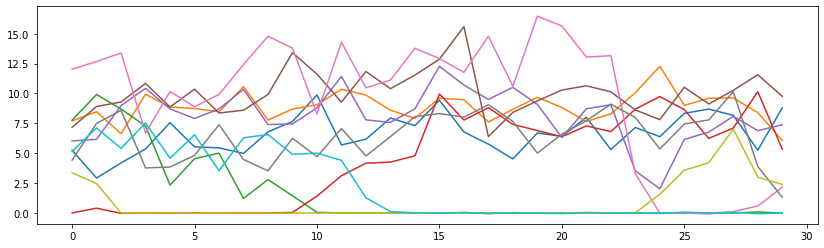

-------------------------------------------
Plotting running spd for container:  571137444
session: 0


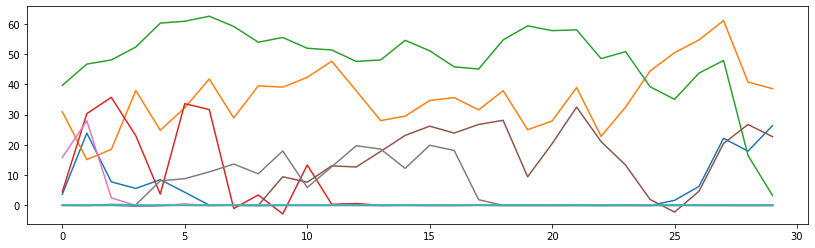

session: 1


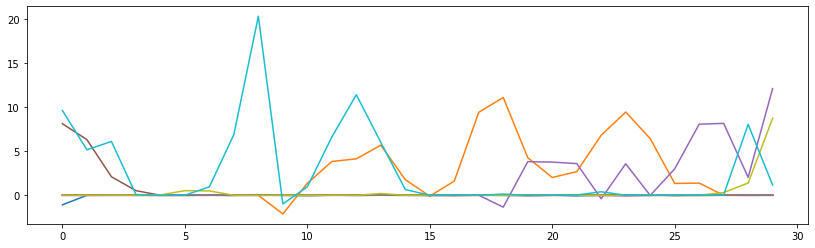

session: 2


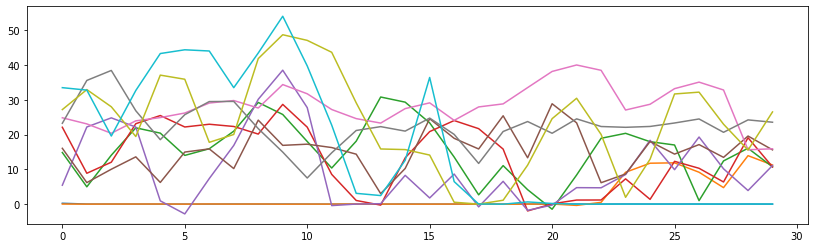

-------------------------------------------
Plotting running spd for container:  511510675
session: 0


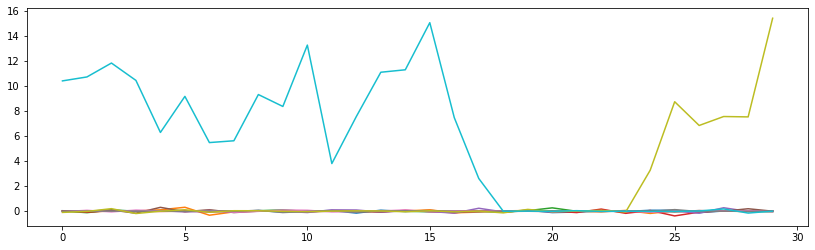

session: 1


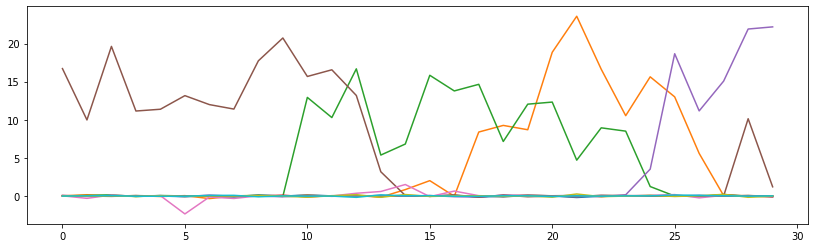

session: 2


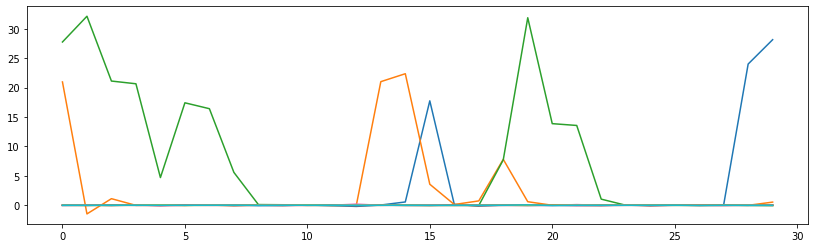

-------------------------------------------
Plotting running spd for container:  531134088
session: 0


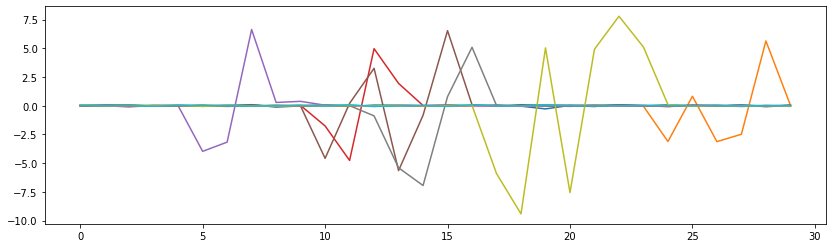

session: 1


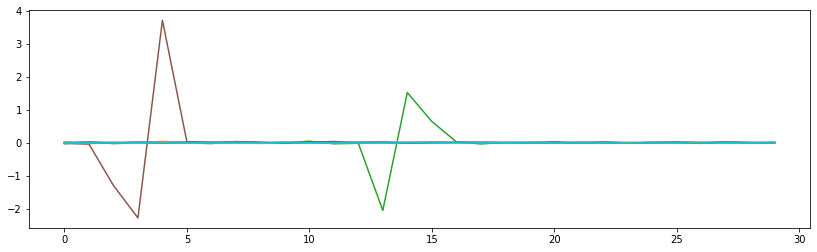

session: 2


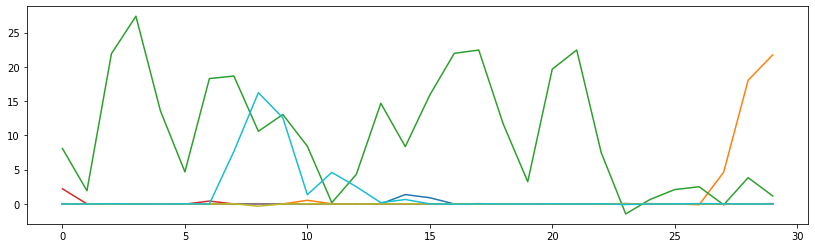

-------------------------------------------
Plotting running spd for container:  647155120
session: 0


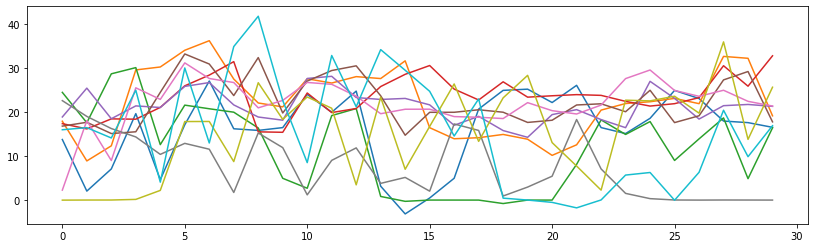

session: 1


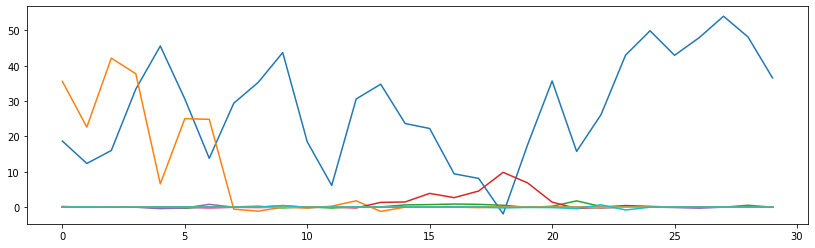

session: 2


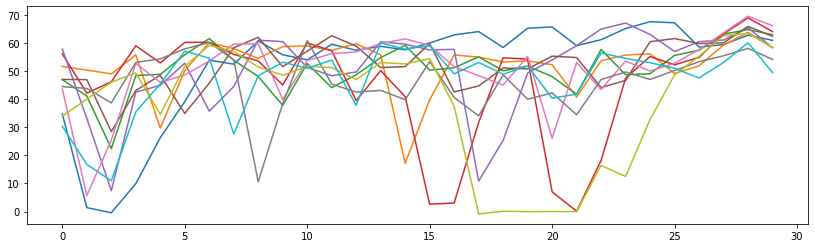

-------------------------------------------
Plotting running spd for container:  657082052
session: 0


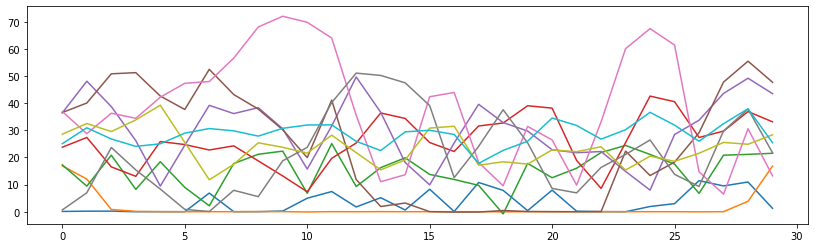

session: 1


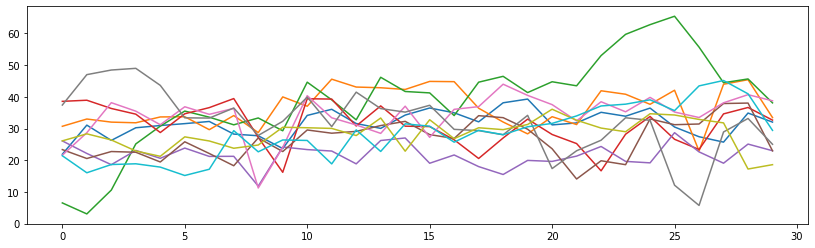

session: 2


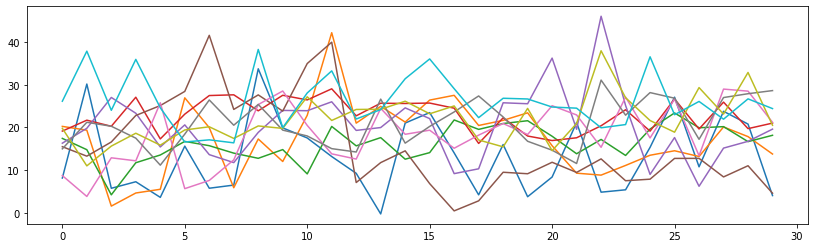

-------------------------------------------
Plotting running spd for container:  653122665
session: 0


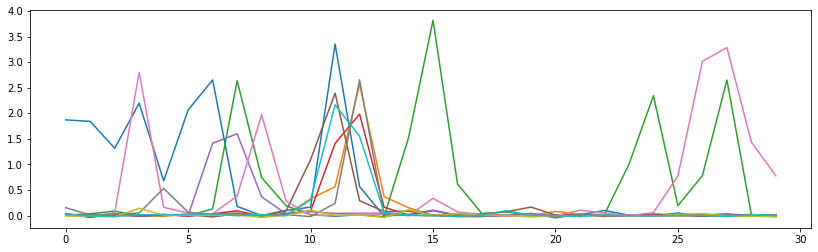

session: 1


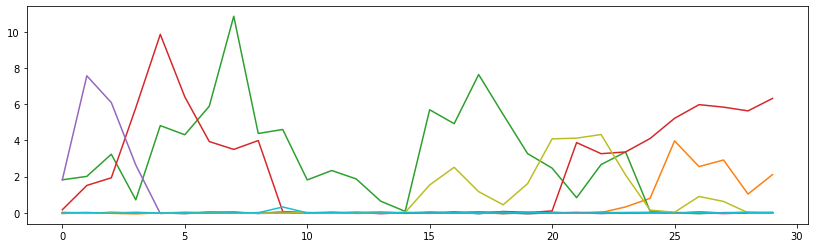

session: 2


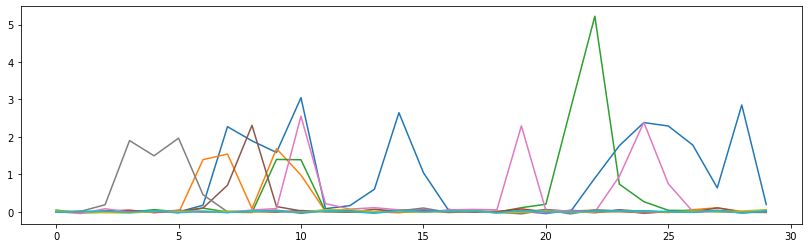

-------------------------------------------
Plotting running spd for container:  679702882
session: 0


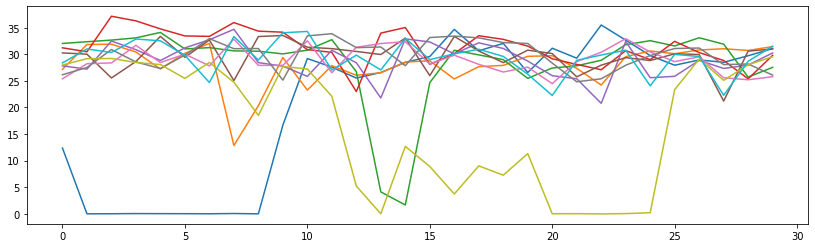

session: 1


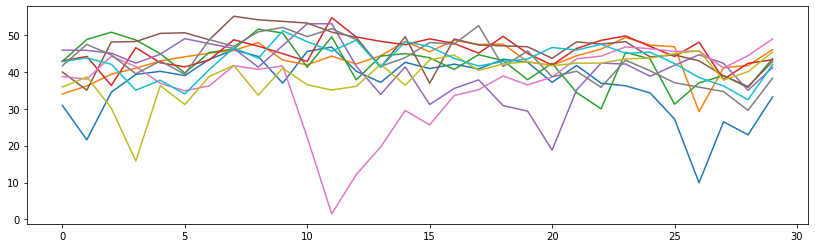

session: 2


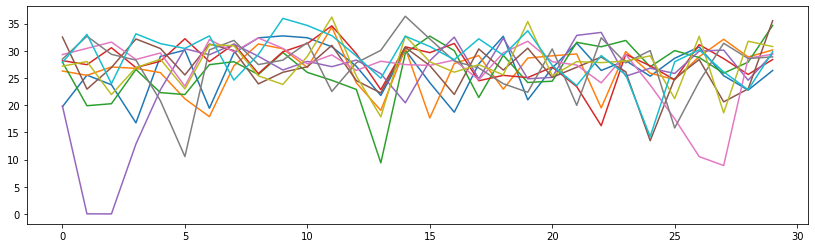

-------------------------------------------
Plotting running spd for container:  653932503
session: 0


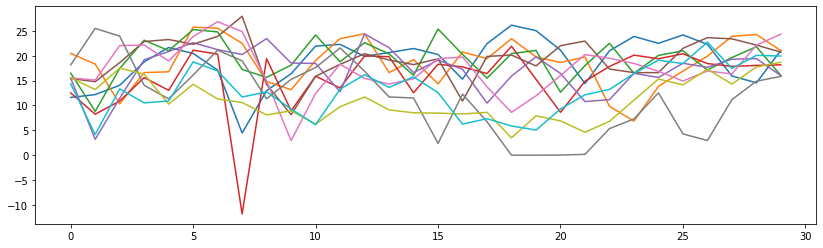

session: 1


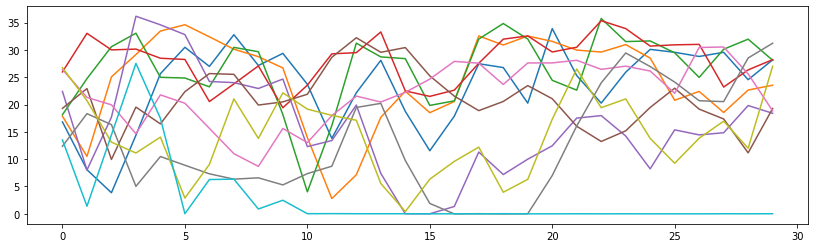

session: 2


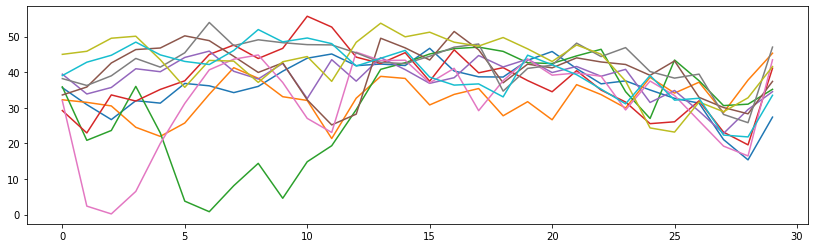

-------------------------------------------
Plotting running spd for container:  661744802
session: 0


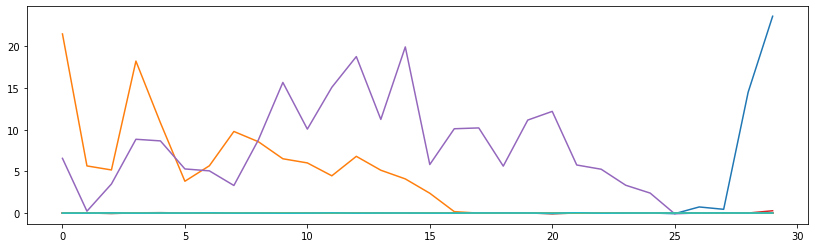

session: 1


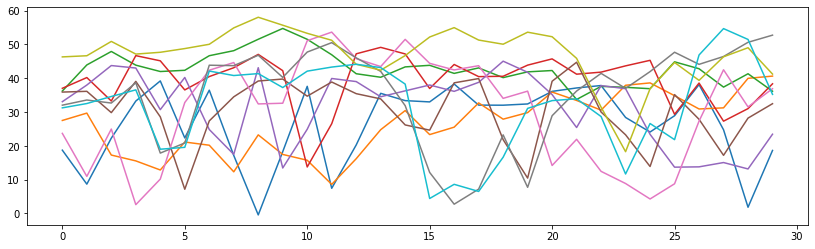

session: 2


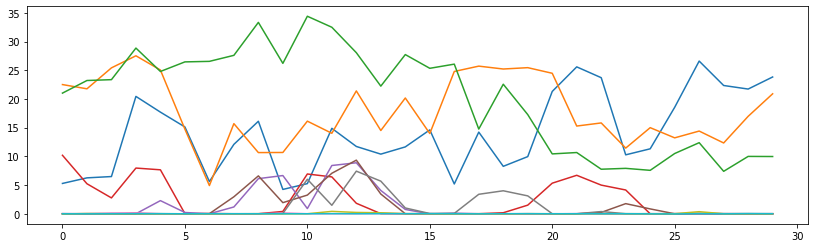

-------------------------------------------
Plotting running spd for container:  648377366
session: 0


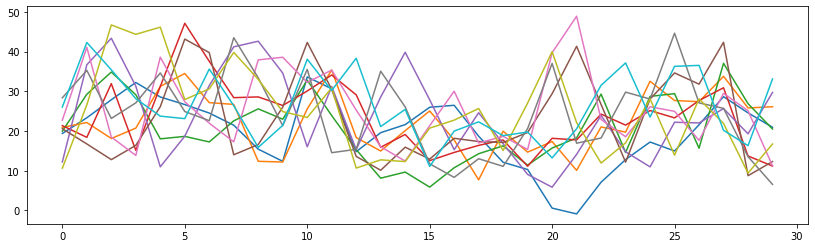

session: 1


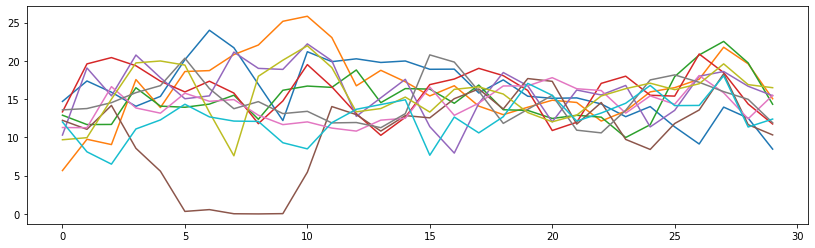

session: 2


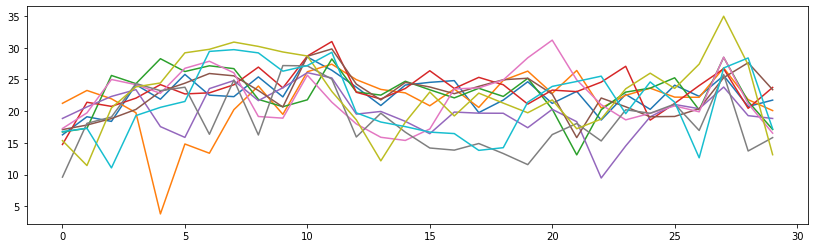

-------------------------------------------


In [72]:
for ec_id in ec_ids_run:
    print('Plotting running spd for container: ',  ec_id)

    exps_container = boc.get_ophys_experiments(experiment_container_ids= [ec_id], stimuli=[stim_info.NATURAL_MOVIE_ONE]) 

    ids = [exp['id'] for exp in exps_container]

    for n, id in enumerate(ids):

        print('session:', n)
        run_vals = get_run_vals(boc, id)
        plot_run(run_vals)

    print('-------------------------------------------')

What do you want?

plot diff in running speed v.s. the R matirx.

1. z-sccore the running
2. difference matrix like you are doing the angles.

In [ ]:
from sklearn.preprocessing import StandardScaler


In [115]:
def z_score_spd(run_vals):
    
    scaler = StandardScaler()
    scaler.fit(run_vals)
    run_vals_centered = scaler.transform(run_vals)

    return run_vals_centered 

In [117]:
def get_spd_diff(run_vals_centered):
    
    within_session_spd_diff = np.zeros((n_repeats*n_divs, n_repeats*n_divs))

    for repeat_idx1 in range(n_repeats):
            for repeat_idx2 in range(n_repeats):
                # corrcoef for all blocks in repeat_1 and repeat_2:
                for div_idx1 in range(n_divs):
                    for div_idx2 in range(n_divs):
                        # calculate angle 
                        # for resp_vec of block_1 in repeat_1 and
                        #  resp_vec in block_2 in repeat_2:
                        within_session_spd_diff[
                            repeat_idx1 * n_divs + div_idx1, 
                            repeat_idx2 * n_divs + div_idx2] = np.abs(
                                run_vals_centered[repeat_idx1, div_idx1] - 
                                run_vals_centered[repeat_idx2, div_idx2])
    
    return within_session_spd_diff

In [154]:
def get_inblock(M, block_idx):

    M_long = M[np.arange(block_idx, 300, 30)]
    M_block = M_long[:, np.arange(block_idx, 300, 30)]

    return M_block 

In [116]:
def upper_tri(M):

    iu = np.triu_indices(M.shape[0], k = 1)
    M_upper_flattern = M[iu]
    
    return   M_upper_flattern               

In [160]:
import rep_drift
from scipy.stats import linregress



Plotting running spd diff. v.s. corr. coef. 637998953


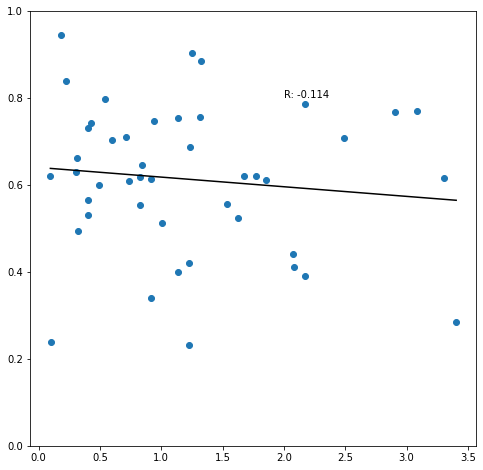

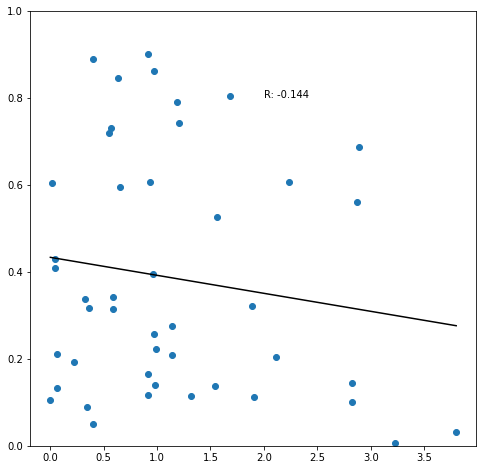

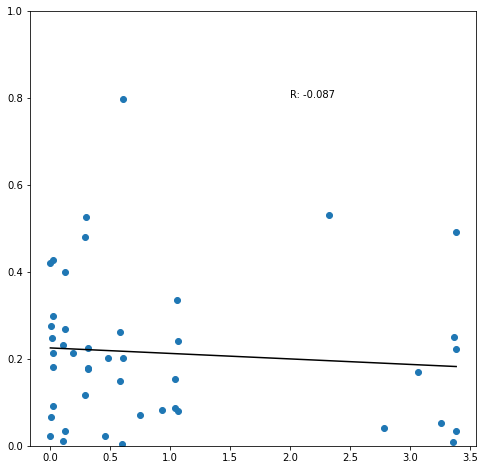

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 674802081


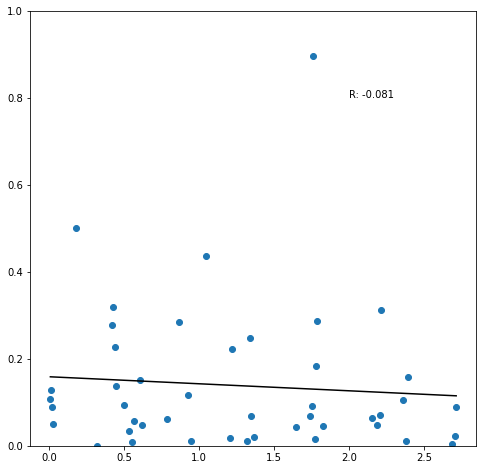

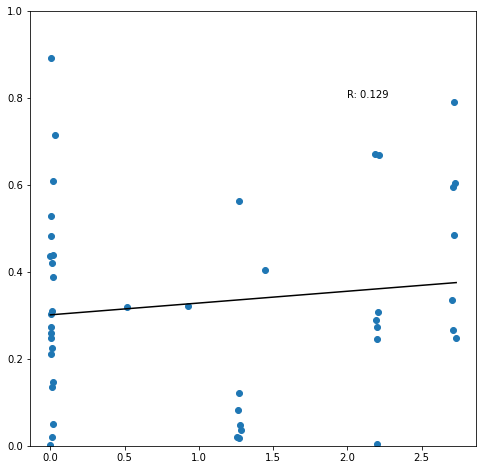

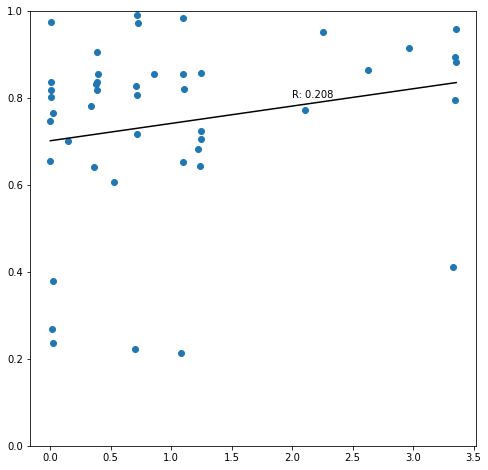

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 643592301


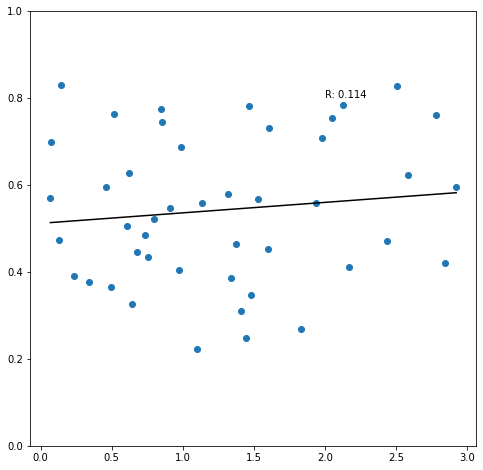

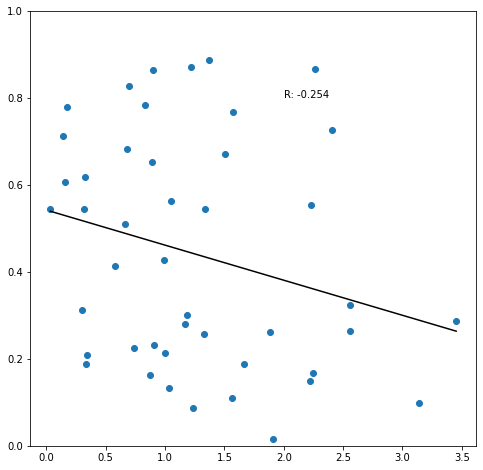

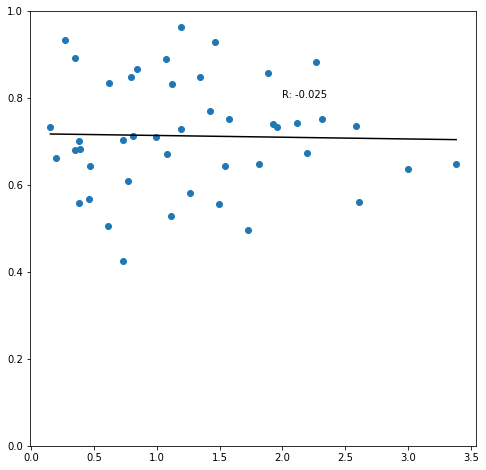

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 528792730


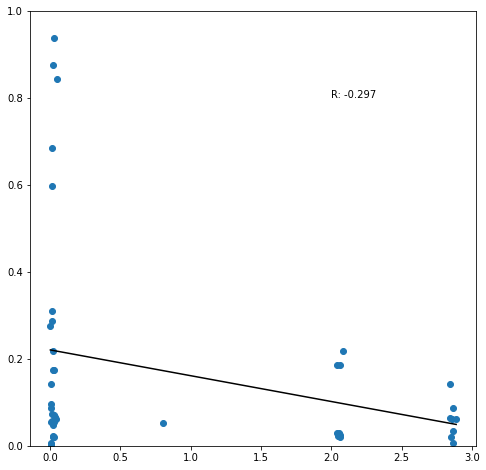

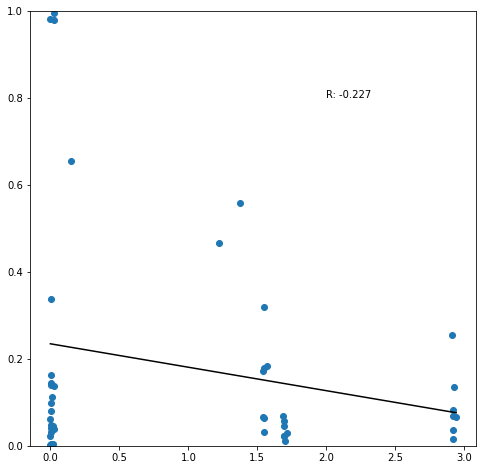

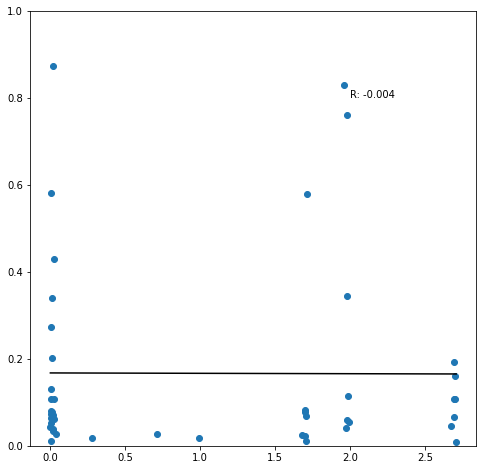

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 602616431


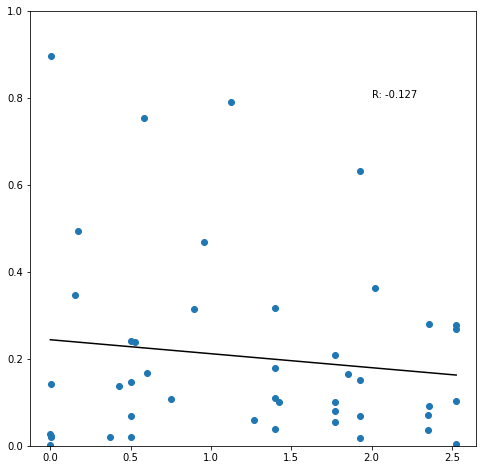

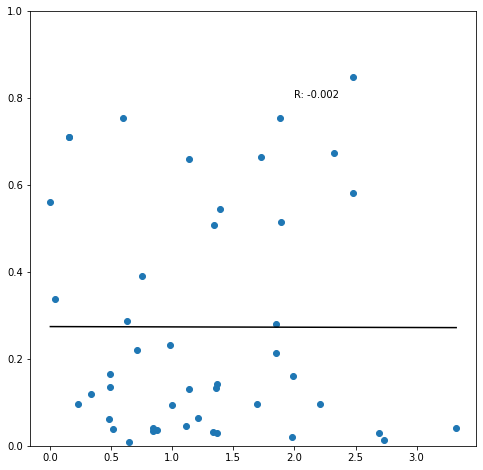

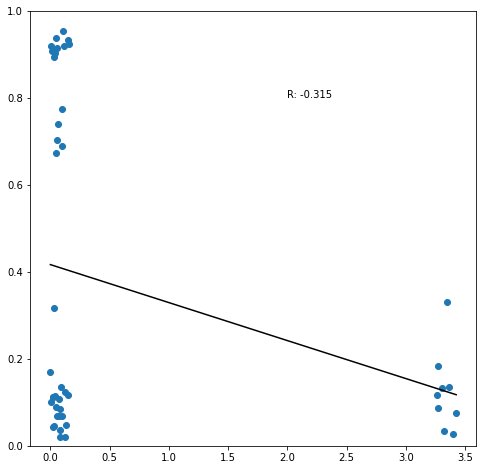

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 603425700


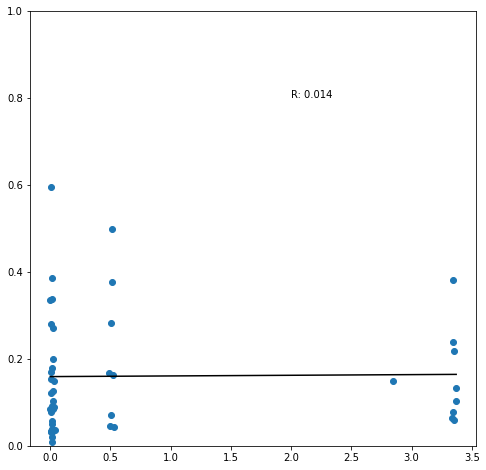

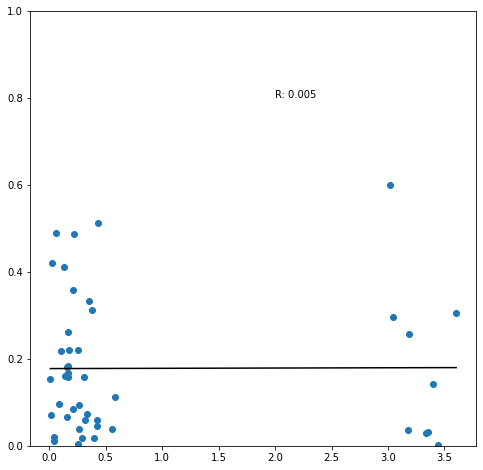

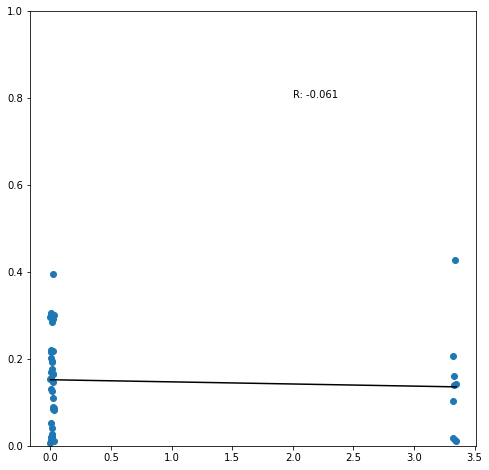

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 644909309


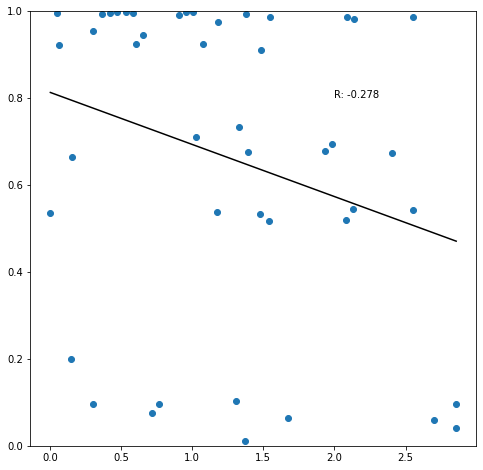

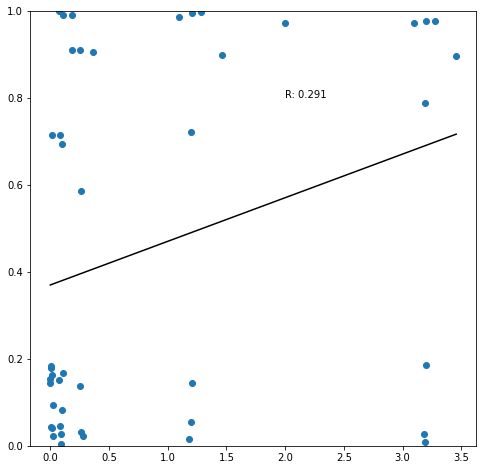

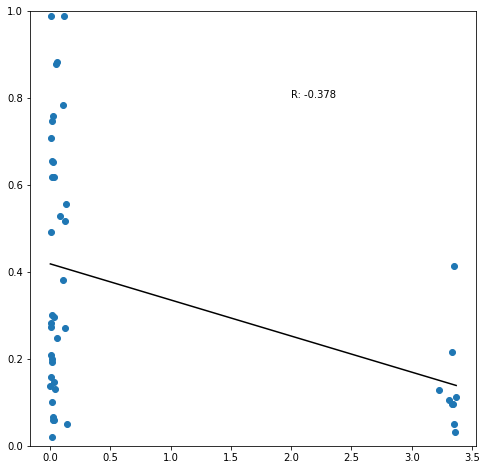

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 665722299


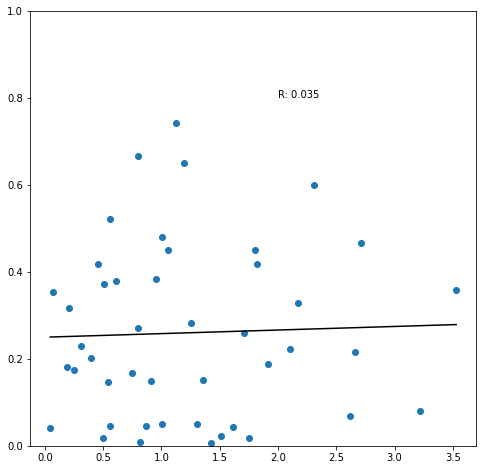

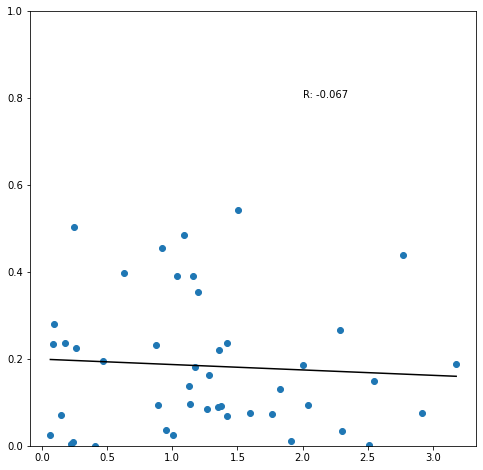

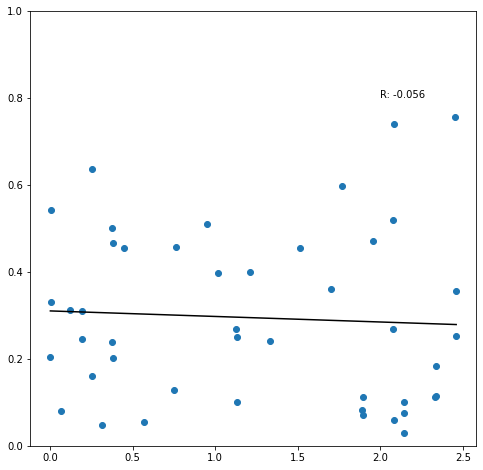

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 649401934


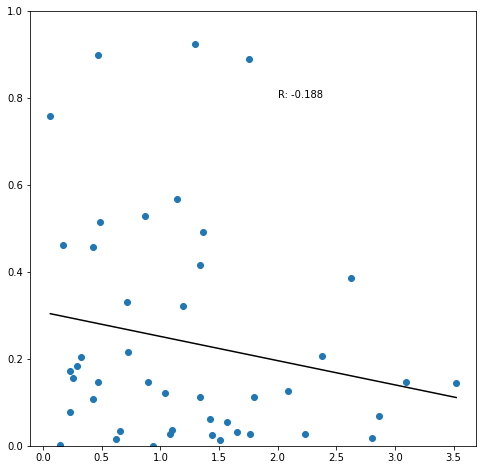

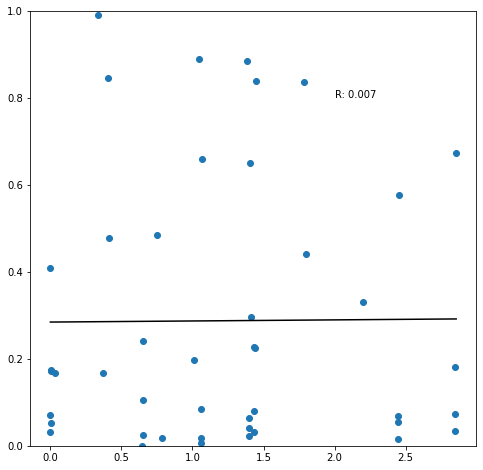

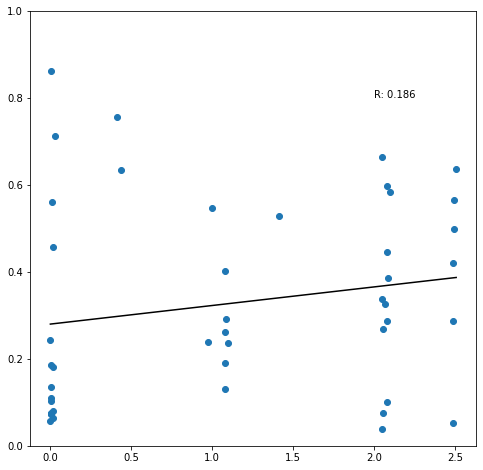

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 588503721


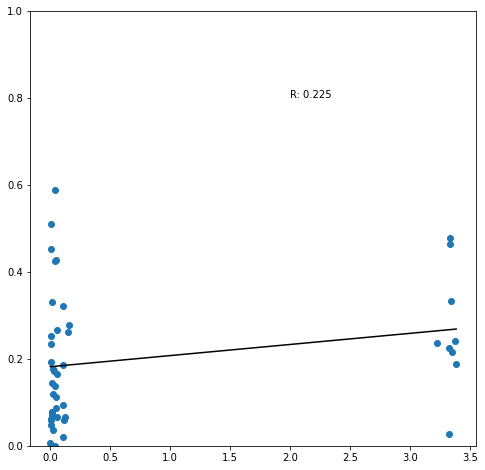

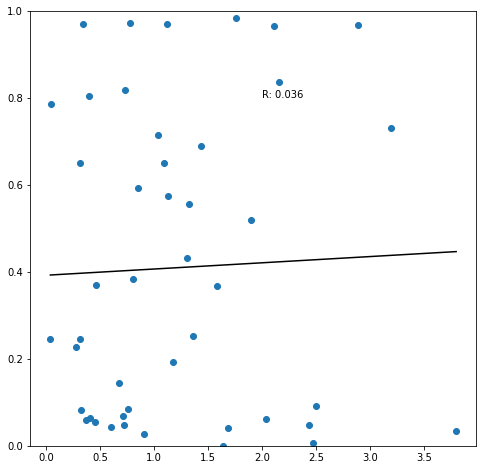

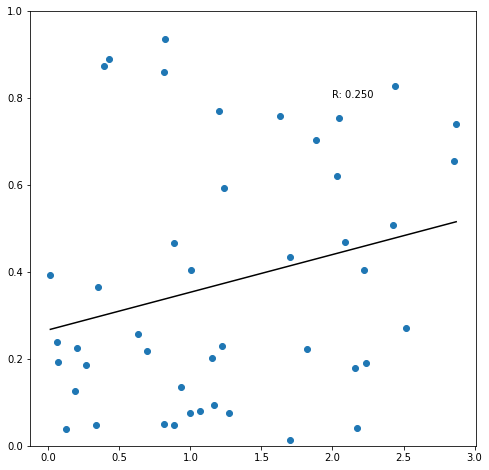

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 571137444


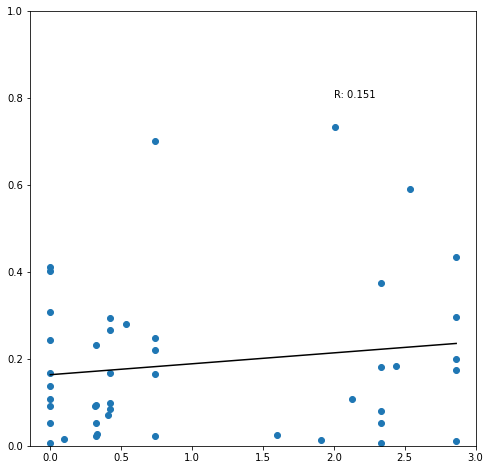

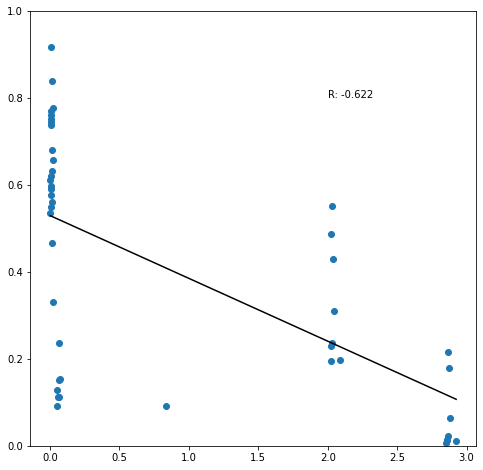

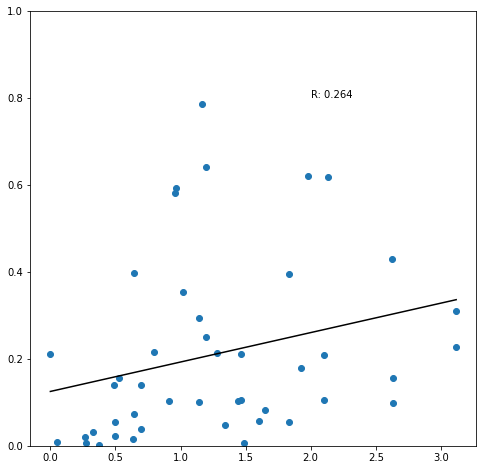

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 511510675


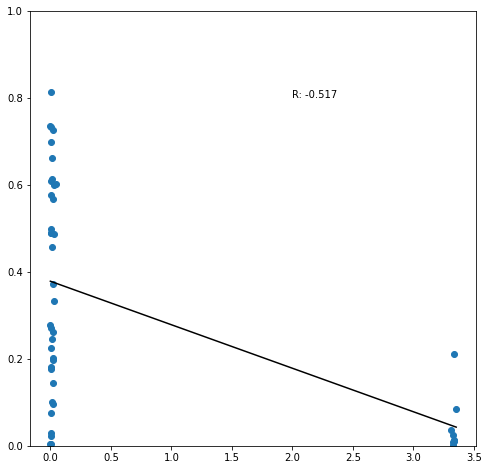

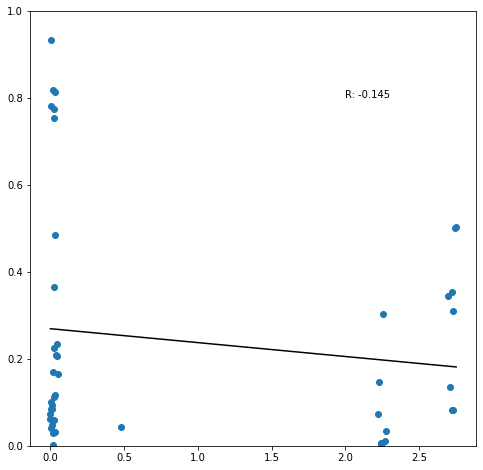

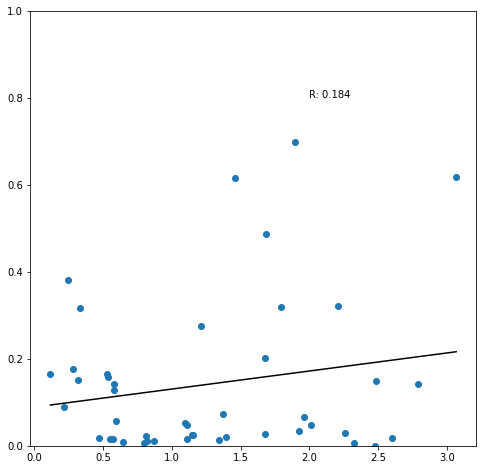

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 531134088


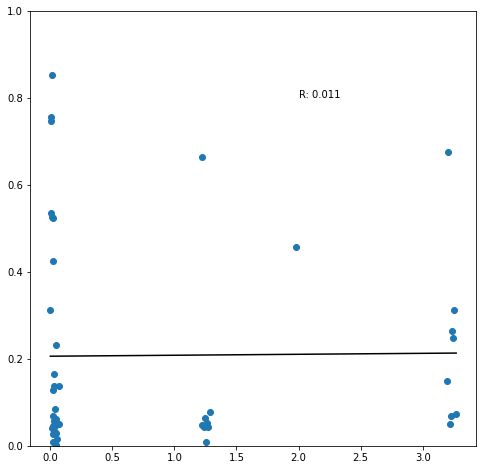

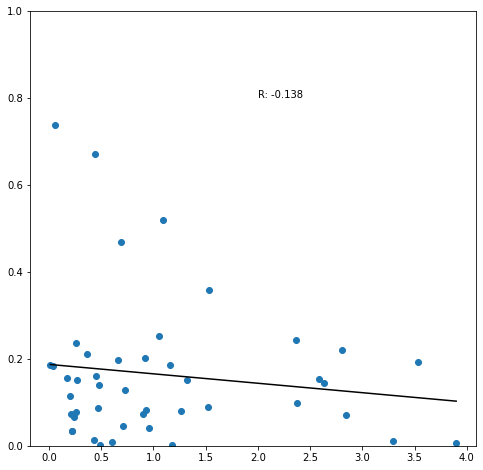

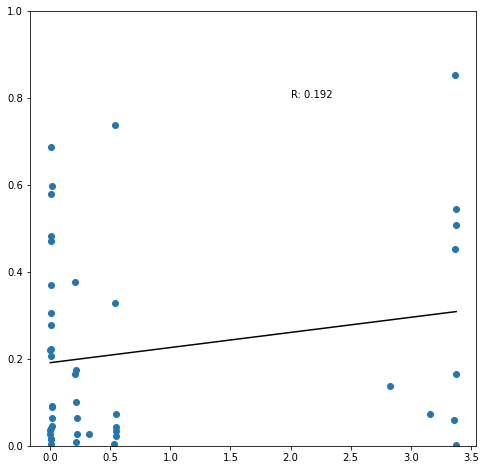

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 647155120


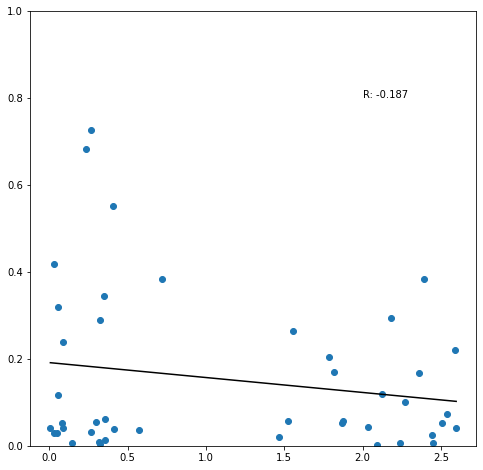

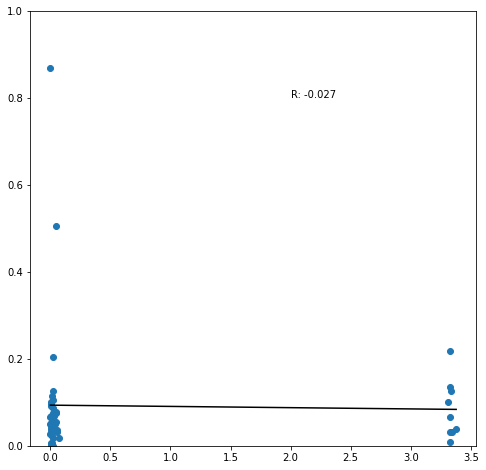

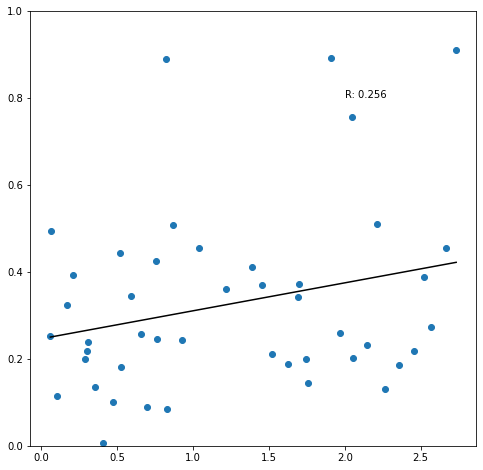

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 657082052


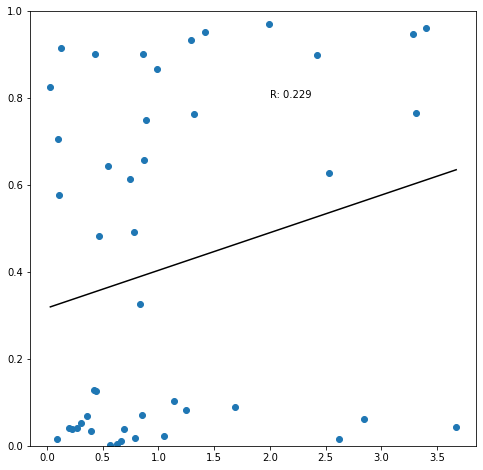

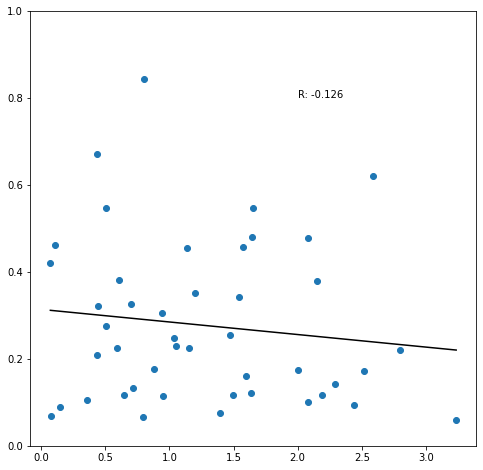

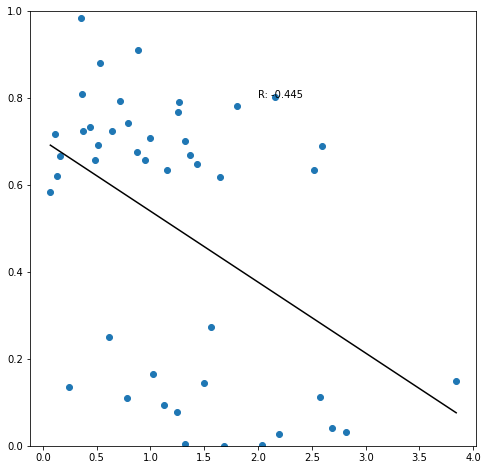

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 653122665


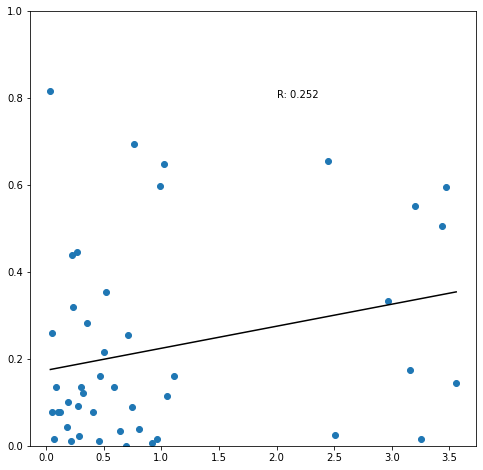

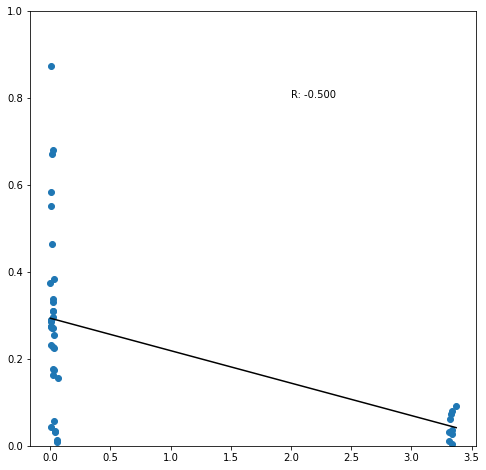

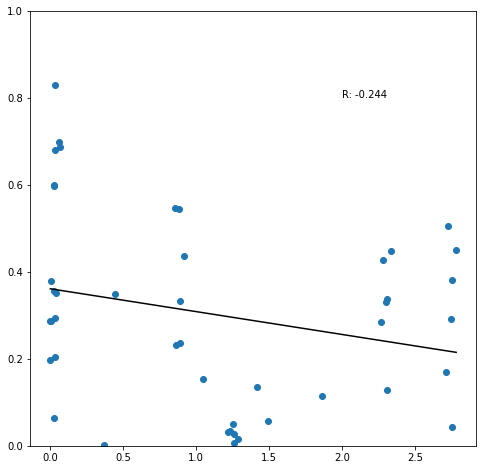

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 679702882


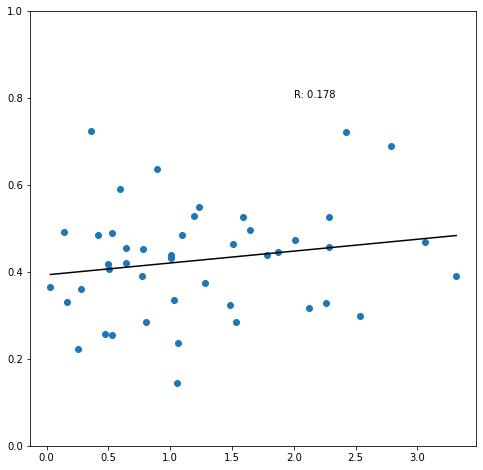

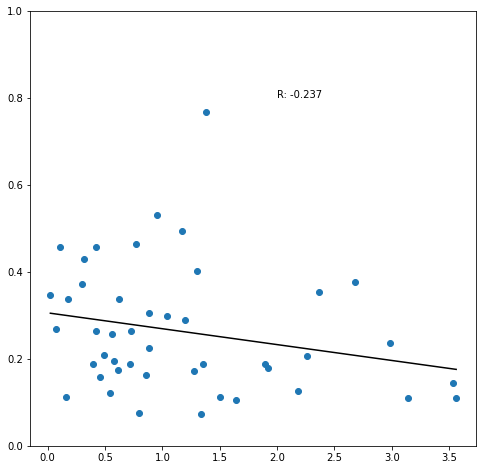

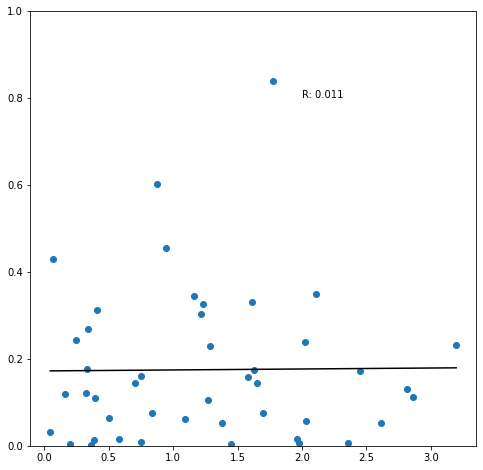

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 653932503


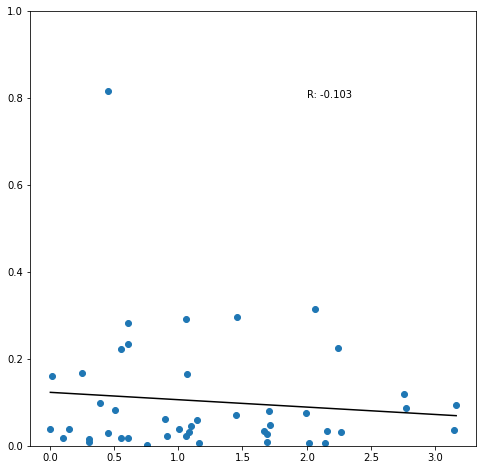

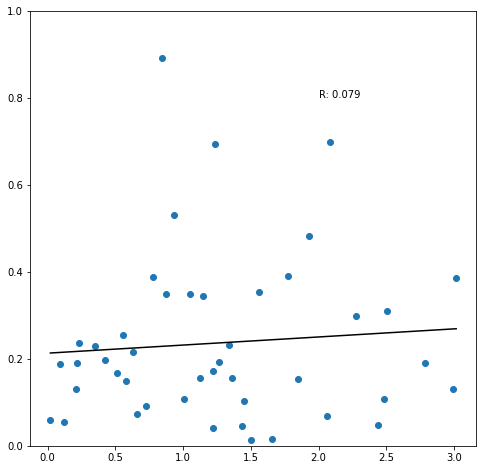

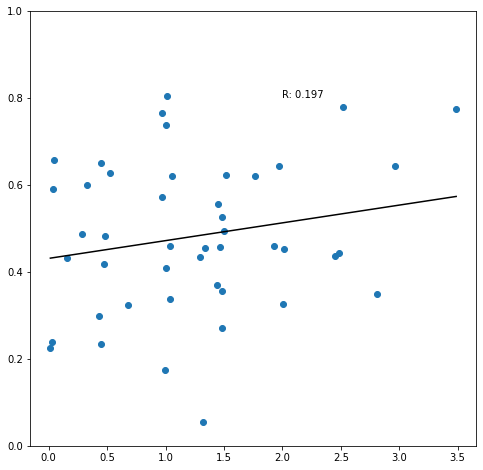

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 661744802


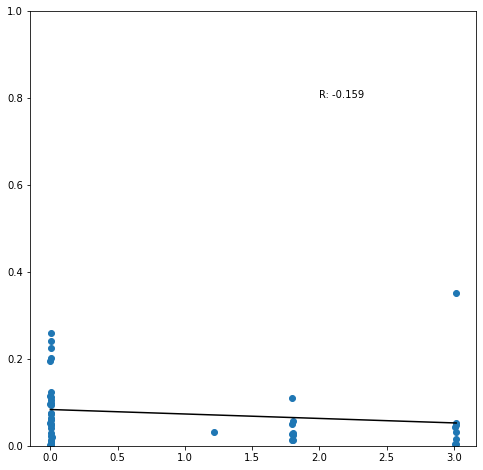

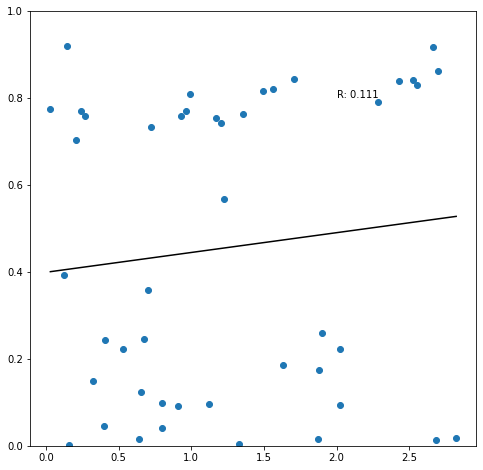

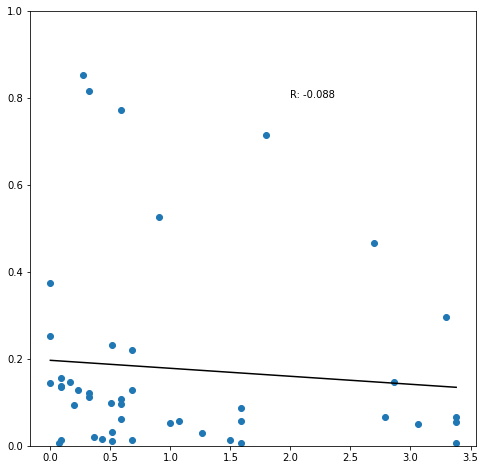

---------------------------------------------
Plotting running spd diff. v.s. corr. coef. 648377366


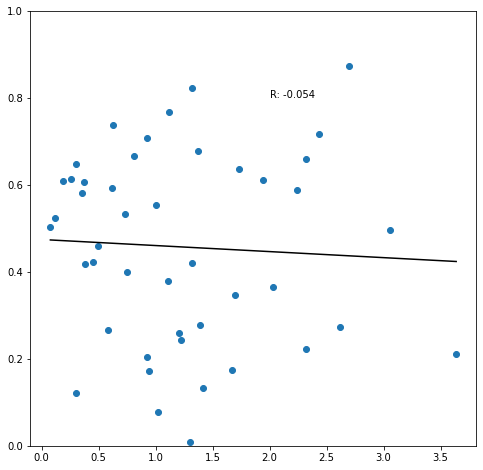

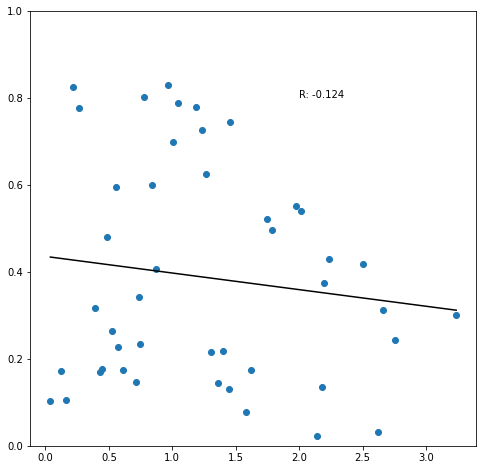

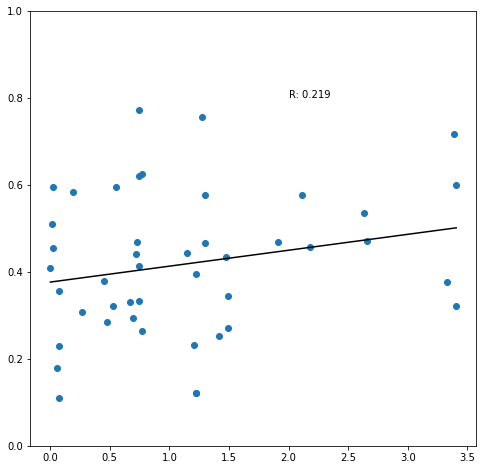

---------------------------------------------


In [167]:
Rs = []
slopes = []
intercepts = []

for ec_id in ec_ids_run:

    print('Plotting running spd diff. v.s. corr. coef.',  ec_id)

    exps_container = boc.get_ophys_experiments(experiment_container_ids= [ec_id], stimuli=[stim_info.NATURAL_MOVIE_ONE]) 

    ids = [exp['id'] for exp in exps_container]

    for id in ids: 
        dataset = boc.get_ophys_experiment_data(id)
        cell_ids, dff_vals, run_vals = rep_drift.get_response_vals(dataset)

        within_session_spd_diff = get_spd_diff(z_score_spd(run_vals))
        block_spd_diff = get_inblock(within_session_spd_diff, block_idx = 10)

        spd_diff_flat = upper_tri(block_spd_diff)

        corrs, angles = rep_drift.calc_similarity(dff_vals)
        block_corrs = get_inblock(corrs, block_idx = 15)
        corrs_flat = np.abs(upper_tri(block_corrs))

        reg = linregress(spd_diff_flat, corrs_flat)

        slopes.append(reg.slope)
        intercepts.append(reg.intercept)
        Rs.append(reg.rvalue)

        fig, ax  = plt.subplots(figsize=(8,8))
        ax.scatter(spd_diff_flat, corrs_flat)

        reg_x = np.linspace(np.min(spd_diff_flat), np.max(spd_diff_flat), num=50)
        reg_y = reg.slope * reg_x + reg.intercept
        ax.plot(reg_x, reg_y, color= 'black')
        ax.text(2, .8, f'R: {reg.rvalue:.3f}')
        ax.set_ylim([0, 1])

        plt.show()
    
    print('---------------------------------------------')

<AxesSubplot:ylabel='Count'>

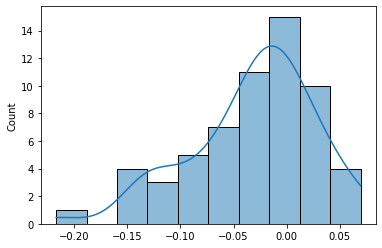

In [165]:
import seaborn as sns

sns.histplot(slopes, kde = True)

<AxesSubplot:ylabel='Count'>

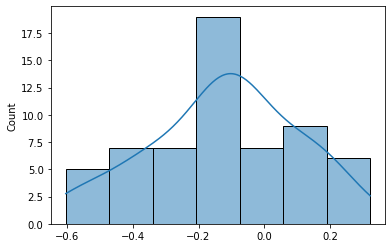

In [166]:
sns.histplot(Rs, kde = True)

Plotting running spd diff. v.s. corr. coef. 648377366


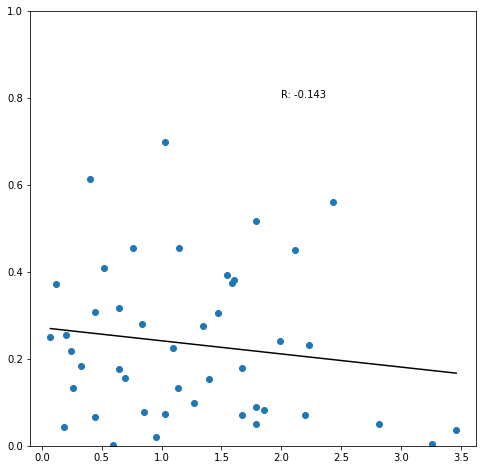

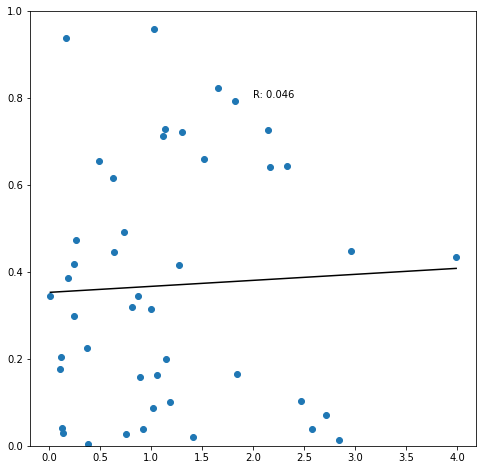

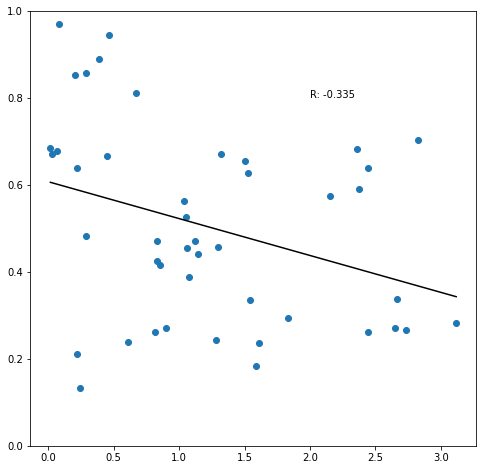

In [170]:
ec = 637998953
print('Plotting running spd diff. v.s. corr. coef.',  ec_id)

exps_container = boc.get_ophys_experiments(experiment_container_ids= [ec_id], stimuli=[stim_info.NATURAL_MOVIE_ONE]) 

ids = [exp['id'] for exp in exps_container]

for id in ids: 
    dataset = boc.get_ophys_experiment_data(id)
    cell_ids, dff_vals, run_vals = rep_drift.get_response_vals(dataset)

    within_session_spd_diff = get_spd_diff(z_score_spd(run_vals))
    block_spd_diff = get_inblock(within_session_spd_diff, block_idx = 17)

    spd_diff_flat = upper_tri(block_spd_diff)

    corrs, angles = rep_drift.calc_similarity(dff_vals)
    block_corrs = get_inblock(corrs, block_idx = 10)
    corrs_flat = np.abs(upper_tri(block_corrs))

    reg = linregress(spd_diff_flat, corrs_flat)

    slopes.append(reg.slope)
    intercepts.append(reg.intercept)
    Rs.append(reg.rvalue)

    fig, ax  = plt.subplots(figsize=(8,8))
    ax.scatter(spd_diff_flat, corrs_flat)

    reg_x = np.linspace(np.min(spd_diff_flat), np.max(spd_diff_flat), num=50)
    reg_y = reg.slope * reg_x + reg.intercept
    ax.plot(reg_x, reg_y, color= 'black')
    ax.text(2, .8, f'R: {reg.rvalue:.3f}')
    ax.set_ylim([0, 1])